In [9]:
import seaborn as sns
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib import rcParams
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sns.set_style('whitegrid', {'xtick.color': '.15',
 'xtick.direction': u'in',
 'xtick.major.size': 10,
 'xtick.minor.size': 1,
 'ytick.color': '.15',
 'ytick.direction': u'in',
 'ytick.major.size': 10,
 'ytick.minor.size': 0.1,
 'grid.color': '.8',
 'axes.edgecolor': '.4',
 'grid.linestyle': u'--',
 'axes.linewidth': 1.0,
 'grid.linewidth': 0.5})

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

paired = sns.color_palette("Set1", 9)
paired2 = sns.color_palette("Paired", 9)
paired3 = sns.color_palette("Set3", 9)


In [10]:
# Load data
# Mask_number show subglacial area with number as retreat time
# ssb_number show ssb geometry
# vz_b_10_964 show basement only water flux in 10 ka retreat
# vz_ppb5_1_964 show aquifer ppb as 10-15 in 1 ka retreat
# vz_sg0_10_964 show base case as 10 ka retreat
# vz_th15_10_964 show 1.5 km SSB with 10 ka retreat
vz_all=sio.loadmat('./vz_output')



In [7]:
vz_all

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jun  3 16:48:11 2022',
 '__version__': '1.0',
 '__globals__': [],
 'Mask_1': array([[ 1.,  1.,  1., ..., nan, nan, nan],
        [nan, nan,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'Mask_10': array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [nan, nan,  1., ...,  1.,  1., nan],
        [nan, nan, nan, ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'Mask_2': array([[ 1.,  1.,  1., ..., nan, nan, nan],
        [nan, nan,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan

<ipython-input-8-f60cccc9fd50>:156: RuntimeWarning: Mean of empty slice
  ts964_1k = np.nanmean(Flux964_1k,axis=0)*1000
<ipython-input-8-f60cccc9fd50>:157: RuntimeWarning: Mean of empty slice
  ts964_2k = np.nanmean(Flux964_2k,axis=0)*1000
<ipython-input-8-f60cccc9fd50>:158: RuntimeWarning: Mean of empty slice
  ts964_3k = np.nanmean(Flux964_3k,axis=0)*1000
<ipython-input-8-f60cccc9fd50>:159: RuntimeWarning: Mean of empty slice
  ts964_4k = np.nanmean(Flux964_4k,axis=0)*1000
<ipython-input-8-f60cccc9fd50>:160: RuntimeWarning: Mean of empty slice
  ts964_5k = np.nanmean(Flux964_5k,axis=0)*1000
<ipython-input-8-f60cccc9fd50>:161: RuntimeWarning: Mean of empty slice
  ts964_7k = np.nanmean(Flux964_7k,axis=0)*1000
<ipython-input-8-f60cccc9fd50>:162: RuntimeWarning: Mean of empty slice
  ts964_9k = np.nanmean(Flux964_9k,axis=0)*1000


Text(155, 19, '$\\bf{e}$')

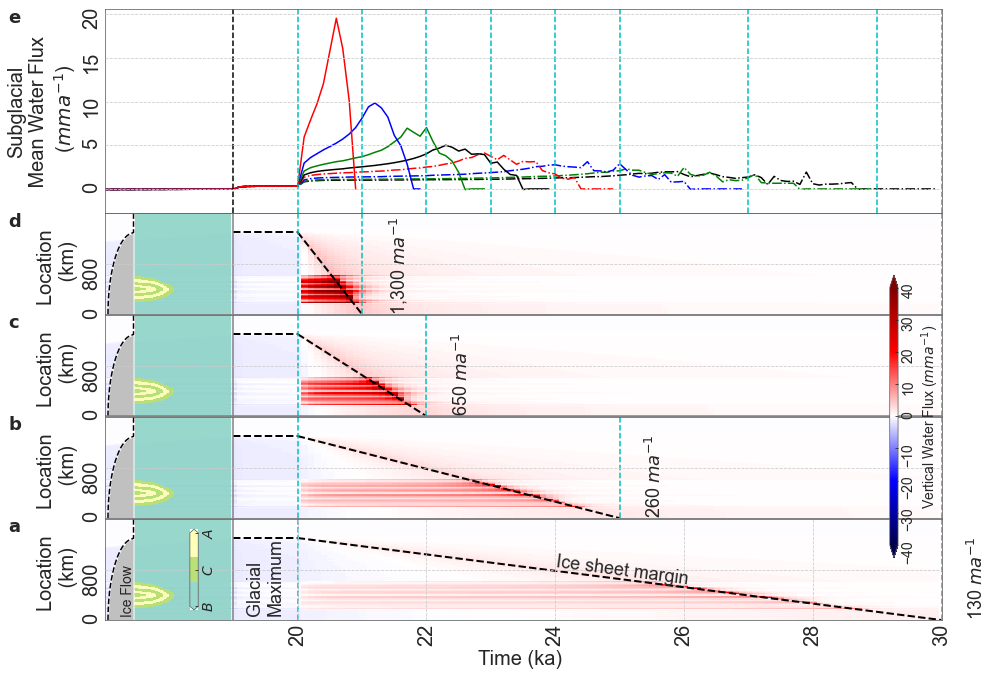

In [8]:
Flux964_1k= (vz_all['vz_sg0_1_964']-vz_all['vz_b_1_964'])*vz_all['Mask_1']
Flux964_2k= (vz_all['vz_sg0_2_964']-vz_all['vz_b_2_964'])*vz_all['Mask_2']
Flux964_3k= (vz_all['vz_sg0_3_964']-vz_all['vz_b_3_964'])*vz_all['Mask_3']
Flux964_4k= (vz_all['vz_sg0_4_964']-vz_all['vz_b_4_964'])*vz_all['Mask_4']

Flux964_5k= (vz_all['vz_sg0_5_964']-vz_all['vz_b_5_964'])*vz_all['Mask_5']
Flux964_7k= (vz_all['vz_sg0_7_964']-vz_all['vz_b_7_964'])*vz_all['Mask_7']
Flux964_9k= (vz_all['vz_sg0_9_964']-vz_all['vz_b_9_964'])*vz_all['Mask_9']
Flux964_10k= (vz_all['vz_sg0_10_964']-vz_all['vz_b_10_964'])*vz_all['Mask_10']

plot_min=-40
plot_max=40
comap='seismic'

GEO=vz_all['ssb3']

scale=0.0098
xm=710
f = plt.figure()
f.set_size_inches(15,15)
plt.rc('axes', axisbelow=False)

plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)

time=list(range(1, 300))

ax1 = plt.subplot2grid((8,1),(5,0),rowspan=1,colspan=1)

extent = [0.5,299.5,0,1600]

im_1 = ax1.imshow(np.flipud(vz_all['vz_sg0_10_964'])*1000,interpolation='none',vmin=plot_min, vmax=plot_max, cmap=comap,extent=extent)

extent2 = [174.5,189.5,0,1600]
cmap = mpl.colors.ListedColormap([(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
                                  (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
                                  (1.0, 1.0, 0.7019607843137254)])

im_2 = ax1.imshow(np.flipud(np.fliplr(GEO.T)),interpolation='none',alpha=0.9,cmap=cmap, extent=extent2 )

plt.plot((-vz_all['nu_i_10k'][700,:]/5000*5+174.5),list(range(0, 1616,16)),'k--')

plt.fill_between((-vz_all['nu_i_10k'][700,:]/5000*5+174.5), 0, list(range(0, 1616,16)),facecolor='silver')

plt.plot([200, 300], [1300, 0], 'k--', lw=2)
plt.plot([190, 200], [1300, 1300], 'k--', lw=2)

plt.annotate(text='', xy=(305,120), xytext=(320,120), color='black', arrowprops=dict(arrowstyle='<->'),)

plt.annotate(text='', xy=(304,120), xytext=(304,720), color='black', arrowprops=dict(arrowstyle='<-'),)


plt.axvline(x=190, color='grey',linestyle='-')
plt.axvline(x=200, color='c',linestyle='--')
plt.axvline(x=300, color='c',linestyle='--')

ax1.set_aspect(scale)
plt.ylabel('Location \n (km)')
plt.yticks(np.arange(0, 1600, 800),rotation=90)
#plt.yticks([])



plt.xlim([170,300])
plt.xlabel(r'Time (ka) ')
positions = (200, 220, 240, 260, 280, 300)
labels = (20,22,24,26,28,30)
plt.xticks(positions, labels,rotation=90)


ax2 = plt.subplot2grid((8,1),(4,0),rowspan=1,colspan=1)

extent = [0.5,299.5,0,1600]

im_3 = ax2.imshow(np.flipud(vz_all['vz_sg0_5_964'])*1000,interpolation='none',vmin=plot_min, vmax=plot_max, cmap=comap,extent=extent)
plt.plot([200, 250], [1300, 0], 'k--', lw=2)
plt.plot([190, 200], [1300, 1300], 'k--', lw=2)

im_4 = ax2.imshow(np.flipud(np.fliplr(GEO.T)),interpolation='none',alpha=0.9,cmap=cmap, extent=extent2 )

plt.axvline(x=190, color='grey',linestyle='-')
plt.axvline(x=200, color='c',linestyle='--')
plt.axvline(x=250, color='c',linestyle='--')
plt.axvline(x=300, color='c',linestyle='--')

plt.plot((-vz_all['nu_i_10k'][700,:]/5000*5+174.5),list(range(0, 1616,16)),'k--')

plt.fill_between((-vz_all['nu_i_10k'][700,:]/5000*5+174.5), 0, list(range(0, 1616,16)),facecolor='silver')


ax2.set_aspect(scale)
plt.ylabel('Location \n (km)')
plt.yticks(np.arange(0, 1600, 800),rotation=90)

plt.xlim([170,300])
plt.xticks([])

ax3 = plt.subplot2grid((8,1),(3,0),rowspan=1,colspan=1)


extent = [0.5,299.5,0,1600]

im_31 = ax3.imshow(np.flipud(vz_all['vz_sg0_2_964'])*1000,interpolation='none',vmin=plot_min, vmax=plot_max, cmap=comap,extent=extent)
plt.plot([200, 220], [1300, 0], 'k--', lw=2)
plt.plot([190, 200], [1300, 1300], 'k--', lw=2)

im_32 = ax3.imshow(np.flipud(np.fliplr(GEO.T)),interpolation='none',alpha=0.9,cmap=cmap, extent=extent2 )

plt.axvline(x=190, color='grey',linestyle='-')
plt.axvline(x=200, color='c',linestyle='--')
plt.axvline(x=220, color='c',linestyle='--')
plt.axvline(x=300, color='c',linestyle='--')

plt.plot((-vz_all['nu_i_10k'][700,:]/5000*5+174.5),list(range(0, 1616,16)),'k--')

plt.fill_between((-vz_all['nu_i_10k'][700,:]/5000*5+174.5), 0, list(range(0, 1616,16)),facecolor='silver')


ax3.set_aspect(scale)
plt.ylabel('Location \n (km)')
plt.yticks(np.arange(0, 1600, 800),rotation=90)

plt.xlim([170,300])
plt.xticks([])

ax4 = plt.subplot2grid((8,1),(2,0),rowspan=1,colspan=1)


extent = [0.5,299.5,0,1600]

im_41 = ax4.imshow(np.flipud(vz_all['vz_sg0_1_964'])*1000,interpolation='none',vmin=plot_min, vmax=plot_max, cmap=comap,extent=extent)
plt.plot([200, 210], [1300, 0], 'k--', lw=2)
plt.plot([190, 200], [1300, 1300], 'k--', lw=2)

im_42 = ax4.imshow(np.flipud(np.fliplr(GEO.T)),interpolation='none',alpha=0.9,cmap=cmap, extent=extent2 )

plt.axvline(x=190, color='grey',linestyle='-')
plt.axvline(x=200, color='c',linestyle='--')
plt.axvline(x=210, color='c',linestyle='--')
plt.axvline(x=300, color='c',linestyle='--')

plt.plot((-vz_all['nu_i_10k'][700,:]/5000*5+174.5),list(range(0, 1616,16)),'k--')

plt.fill_between((-vz_all['nu_i_10k'][700,:]/5000*5+174.5), 0, list(range(0, 1616,16)),facecolor='silver')

ax4.set_aspect(scale)
plt.ylabel('Location \n (km)')
plt.yticks(np.arange(0, 1600, 800),rotation=90)

plt.xlim([170,300])
plt.xticks([])


ax5 = plt.subplot2grid((8,1),(0,0),rowspan=2,colspan=1)

ts964_1k = np.nanmean(Flux964_1k,axis=0)*1000  
ts964_2k = np.nanmean(Flux964_2k,axis=0)*1000
ts964_3k = np.nanmean(Flux964_3k,axis=0)*1000
ts964_4k = np.nanmean(Flux964_4k,axis=0)*1000
ts964_5k = np.nanmean(Flux964_5k,axis=0)*1000
ts964_7k = np.nanmean(Flux964_7k,axis=0)*1000  
ts964_9k = np.nanmean(Flux964_9k,axis=0)*1000  
ts964_10k = np.nanmean(Flux964_10k,axis=0)*1000  

ax5.plot(time,np.squeeze(ts964_10k),color='k',marker='.',markersize=0.1,linestyle='-.')
ax5.plot(time,np.squeeze(ts964_9k),color='g',marker='.',markersize=0.1,linestyle='-.')
ax5.plot(time,np.squeeze(ts964_7k),color='b',marker='.',markersize=0.1,linestyle='-.')
ax5.plot(time,np.squeeze(ts964_5k),color='r',marker='.',markersize=0.1,linestyle='-.')
ax5.plot(time,np.squeeze(ts964_4k),color='k',marker='.',markersize=0.1,linestyle='-')
ax5.plot(time,np.squeeze(ts964_3k),color='g',marker='.',markersize=0.1,linestyle='-')
ax5.plot(time,np.squeeze(ts964_2k),color='b',marker='.',markersize=0.1,linestyle='-')
ax5.plot(time,np.squeeze(ts964_1k),color='r',marker='.',markersize=0.1,linestyle='-')


#ax5.legend([ '130  ', '144 ', '196 ', '260 ', 
 #           '325 ','433 ','650 ','1,300  '], title='Grounding line\n retreat rate $ m a^{-1}$',
 #          ncol=2, fontsize = 14,title_fontsize =14, loc='upper left',framealpha=1)


plt.axvline(x=190, color='k',linestyle='--')
plt.axvline(x=200, color='c',linestyle='--')
plt.axvline(x=210, color='c',linestyle='--')
plt.axvline(x=220, color='c',linestyle='--')
plt.axvline(x=230, color='c',linestyle='--')
plt.axvline(x=240, color='c',linestyle='--')
plt.axvline(x=250, color='c',linestyle='--')
plt.axvline(x=270, color='c',linestyle='--')
plt.axvline(x=290, color='c',linestyle='--')

plt.axvline(x=300, color='c',linestyle='--')

plt.ylabel('Subglacial\n Mean Water Flux \n ($mm a^{-1}$)')
plt.yticks(rotation=90)

ax3.axhline(y=0,color=(0.5,0.5,0.5))

plt.xlim([170,300])
plt.xticks([])



cbaxes = inset_axes(ax3, width="1%", height="280%", loc='lower right',bbox_to_anchor=(-0.04, -1.5, 1, 1),bbox_transform=ax3.transAxes) 

cbar = plt.colorbar(im_1,cax=cbaxes, orientation='vertical',extend='both')

cbar.ax.tick_params(labelsize=14,rotation=90)
cbar.set_label(label='Vertical Water Flux ($mm a^{-1}$)',size=14)

cbaxes2 = inset_axes(ax1, width="1%", height="80%", loc='center left',bbox_to_anchor=(0.09, 0., 1, 1),bbox_transform=ax1.transAxes,) 
cbar2 = plt.colorbar(im_2,cax=cbaxes2, orientation='vertical',extend='both')
cbar2.ax.tick_params(labelsize=14,rotation=90)
cbar2.set_ticks([1, 2, 3])
cbar2.set_ticklabels(["$B$", "$C$", "$A$"])

ax1.text(192,140,'Glacial\nMaximum',fontsize=18,rotation=90)
ax1.text(240,580,'Ice sheet margin',fontsize=18,rotation=-7.5)

ax1.text(304,80,'130 $m a^{-1}$ ',fontsize=18,rotation=90)
ax2.text(254,80,'260 $m a^{-1}$ ',fontsize=18,rotation=90)
ax3.text(224,80,'650 $m a^{-1}$ ',fontsize=18,rotation=90)
ax4.text(214,80,'1,300 $m a^{-1}$ ',fontsize=18,rotation=90)

#ax1.text(175,-150,'Depth 7 km',fontsize=14)

ax1.text(172.5,100,'Ice Flow',fontsize=14,rotation=90)


ax1.text(155,1400,'$\\bf{a}$',fontsize=18)
ax2.text(155,1400,'$\\bf{b}$',fontsize=18)
ax3.text(155,1400,'$\\bf{c}$',fontsize=18)
ax4.text(155,1400,'$\\bf{d}$',fontsize=18)
ax5.text(155,19,'$\\bf{e}$',fontsize=18)

